In [2]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
import matplotlib.pyplot as plt
import json 
import collections
import astropy

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

from astropy.io import fits
from astropy.io import ascii

In [3]:
from astroplan.plots import plot_airmass
from astroplan import Observer
from astroplan import FixedTarget
from astroplan import (AltitudeConstraint, AirmassConstraint,
                       AtNightConstraint)
from astroplan import is_observable, is_always_observable, months_observable
observer = Observer.at_site('palomar')
from astroplan import EclipsingSystem
from astropy.timeseries import LombScargle

In [4]:
lightcurve_ztf = Table.from_pandas(pd.read_csv("J204638.csv"))

In [5]:
correct = lightcurve_ztf[np.where(lightcurve_ztf["mag"] < 15.575)]
row = correct
hjd = np.array(row["mjd"])
hjd = hjd.astype("float")
hjd = hjd * u.day
mag = np.array(row["mag"])
for i in range(len(mag)):
    if(">" in str(mag[i])):
        mag[i] = mag[i][1:-1]
mag = np.asarray(mag)
mag = mag.astype("float")
mag = mag * u.mag
mag_err = np.array(row["magerr"])
mag_err = mag_err.astype("float")
mag_err = mag_err * u.mag

In [6]:
ztf_period = 0.110375275900
ztf_frequency = 1/ztf_period
ztf_frequency

9.06000000313476

In [7]:
ideal_frequency = np.linspace(10, 12.25, 10**6) * (1/u.day)

In [8]:
power = LombScargle(hjd, mag , mag_err).power(ideal_frequency)

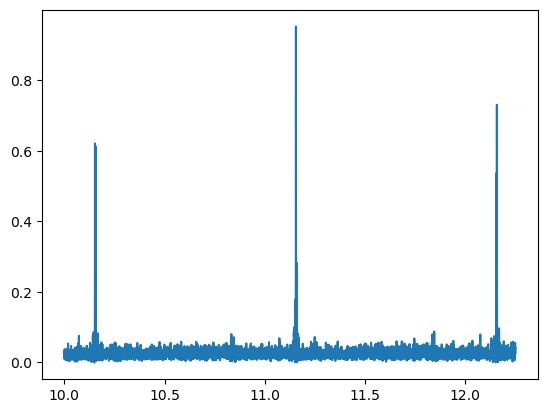

In [9]:
plt.plot(ideal_frequency, power)
#plt.vlines(ztf_frequency, 0, np.max(power), color = "red")

In [10]:
ztf_f = ideal_frequency[np.argmax(power)]
ztf_p = 1/ztf_f
ztf_p

<Quantity 0.08964277 d>

Text(0, 0.5, 'R Mag')

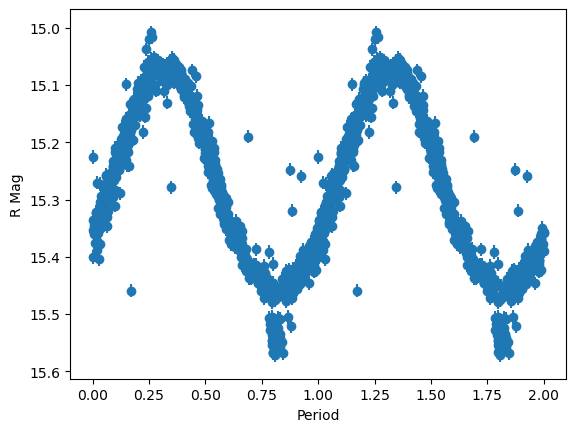

In [11]:
hjd_p_fold = hjd % ztf_p / ztf_p
hjd_p_fold = np.append(hjd_p_fold, 1 + hjd_p_fold)
mag_p_fold = np.append(mag, mag)
mag_err_p_fold = np.append(mag_err, mag_err)
plt.errorbar(hjd_p_fold, mag_p_fold, mag_err_p_fold, fmt = "o")
#plt.xlim(0.7,0.95)
#plt.ylim(15.4, 15.6)
plt.gca().invert_yaxis()

plt.xlabel("Period")
plt.ylabel("R Mag")

Text(0, 0.5, 'R Mag')

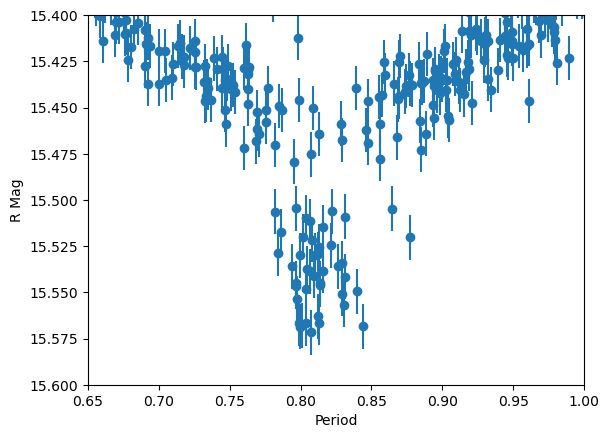

In [12]:
hjd_p_fold = hjd % ztf_p / ztf_p
hjd_p_fold = np.append(hjd_p_fold, 1 + hjd_p_fold)
mag_p_fold = np.append(mag, mag)
mag_err_p_fold = np.append(mag_err, mag_err)
plt.errorbar(hjd_p_fold, mag_p_fold, mag_err_p_fold, fmt = "o")
plt.xlim(0.65,1)
plt.ylim(15.4, 15.6)
plt.gca().invert_yaxis()

plt.xlabel("Period")
plt.ylabel("R Mag")

In [13]:
eclipsing = correct[np.argmax(correct["mag"])]
(eclipsing["mjd"] * u.day)%ztf_p / ztf_p

<Quantity 0.8074506>

In [14]:
primary_eclipse_time = Time(eclipsing["mjd"], format='mjd')
orbital_period = ztf_p
eclipse_duration = 0.06 * ztf_p
eclipse_duration

<Quantity 0.00537857 d>

In [15]:
objects = EclipsingSystem(primary_eclipse_time=primary_eclipse_time,
                           orbital_period=orbital_period, duration=eclipse_duration,
                           name='J204638')
np.save("J204638", np.array([objects]))

In [16]:
observing_time = Time('2023-05-05 7:00')
objects.next_primary_eclipse_time(observing_time, n_eclipses = 16)

<Time object: scale='utc' format='iso' value=['2023-05-05 07:58:25.337' '2023-05-05 10:07:30.472'
 '2023-05-05 12:16:35.607' '2023-05-05 14:25:40.743'
 '2023-05-05 16:34:45.878' '2023-05-05 18:43:51.013'
 '2023-05-05 20:52:56.148' '2023-05-05 23:02:01.283'
 '2023-05-06 01:11:06.418' '2023-05-06 03:20:11.553'
 '2023-05-06 05:29:16.688' '2023-05-06 07:38:21.823'
 '2023-05-06 09:47:26.959' '2023-05-06 11:56:32.094'
 '2023-05-06 14:05:37.229' '2023-05-06 16:14:42.364']>

In [17]:
objects.next_secondary_eclipse_time(observing_time, n_eclipses = 16)

<Time object: scale='utc' format='iso' value=['2023-05-05 09:02:57.905' '2023-05-05 11:12:03.040'
 '2023-05-05 13:21:08.175' '2023-05-05 15:30:13.310'
 '2023-05-05 17:39:18.445' '2023-05-05 19:48:23.580'
 '2023-05-05 21:57:28.715' '2023-05-06 00:06:33.851'
 '2023-05-06 02:15:38.986' '2023-05-06 04:24:44.121'
 '2023-05-06 06:33:49.256' '2023-05-06 08:42:54.391'
 '2023-05-06 10:51:59.526' '2023-05-06 13:01:04.661'
 '2023-05-06 15:10:09.796' '2023-05-06 17:19:14.931']>